# A*Star BII programming interview

### Question 6

In [3]:
from shapely import geometry
import matplotlib.pyplot as plt

In [13]:
class question_6:
    def run(self, polygon_file, input_file, output_file, plot=False):
        polygon, line_string = self.create_polygon(polygon_file)
        points = self.read_input(input_file)
        point_list = self.parse_points(points)
        in_list = []
        for point in point_list:
            point_obj = geometry.Point(point)
            in_list.append(polygon.contains(point_obj) or line_string.contains(point_obj))
        if plot:
            self.plot_polygon(polygon, point_list, in_list)
        self.write_output(point_list, in_list, output_file)
    
    def create_polygon(self, polygon_file):
        lines = self.read_input(polygon_file)
        points = self.parse_points(lines)
        polygon = geometry.Polygon(points)
        line_string = geometry.LineString(points)
        return polygon, line_string
    
    def read_input(self, input_file):
        with open(input_file, 'r') as rf:
            lines = rf.readlines()
        return lines
    
    def parse_points(self, lines):
        points = []
        for line in lines:
            line = line.replace('\n', '').replace('\t', ' ')
            if line:
                x, y = line.split(' ')
                points.append((int(x), int(y)))
        return points
    
    def plot_polygon(self, polygon, points, in_list):
        in_points = []
        out_points = []
        for i, point in enumerate(points):
            if in_list[i]:
                in_points.append(point)
            else:
                out_points.append(point)
        x, y = polygon.exterior.xy
        plt.plot(x,y)
        plt.scatter(*zip(*in_points), c='b', marker='o')
        plt.scatter(*zip(*out_points), c='r', marker='x')
    
    def write_output(self, point_list, in_list, output_file):
        output_string = ''
        for i, point in enumerate(point_list):
            if in_list[i]:
                third_column = 'inside'
            else:
                third_column = 'outside'
            output_string += str(point[0]) + ' ' + str(point[1]) + ' ' + third_column + '\n'
        with open(output_file, 'w') as wf:
            wf.write(output_string[:-1])

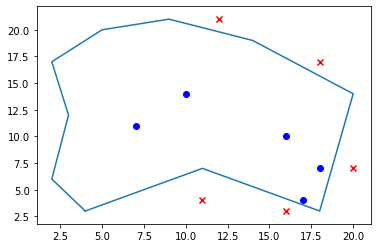

In [14]:
qn = question_6()
qn.run('input_question_6_polygon', 'input_question_6_points', 'output_question_6', plot=True)